In [1]:
import pandas as pd
from datetime import datetime, timedelta
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
plt.style.use('seaborn')

AEMO_df = pd.read_csv("Data/PRICE_AND_DEMAND_SA.csv", header=0, index_col=False)
AEMO_df['SETTLEMENTDATE'] = pd.to_datetime(AEMO_df['SETTLEMENTDATE'])

AEMO_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   REGION          70128 non-null  object        
 1   SETTLEMENTDATE  70128 non-null  datetime64[ns]
 2   TOTALDEMAND     70128 non-null  float64       
 3   RRP             70128 non-null  float64       
 4   PERIODTYPE      70128 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 2.7+ MB


In [2]:
AEMO_df.head(10)

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,SA1,2017-01-01 00:30:00,1395.21,118.39,TRADE
1,SA1,2017-01-01 01:00:00,1306.86,81.34,TRADE
2,SA1,2017-01-01 01:30:00,1239.58,68.04,TRADE
3,SA1,2017-01-01 02:00:00,1173.09,67.09,TRADE
4,SA1,2017-01-01 02:30:00,1101.33,73.06,TRADE
5,SA1,2017-01-01 03:00:00,1093.42,72.38,TRADE
6,SA1,2017-01-01 03:30:00,1045.58,60.30,TRADE
7,SA1,2017-01-01 04:00:00,991.55,54.83,TRADE
8,SA1,2017-01-01 04:30:00,963.20,50.63,TRADE
9,SA1,2017-01-01 05:00:00,959.05,39.99,TRADE


In [3]:
sa_price = AEMO_df.drop(['PERIODTYPE','REGION','TOTALDEMAND'],axis=1)
sa_price.head(10)

,SETTLEMENTDATE,RRP
0,2017-01-01 00:30:00,118.39
1,2017-01-01 01:00:00,81.34
2,2017-01-01 01:30:00,68.04
3,2017-01-01 02:00:00,67.09
4,2017-01-01 02:30:00,73.06
5,2017-01-01 03:00:00,72.38
6,2017-01-01 03:30:00,60.30
7,2017-01-01 04:00:00,54.83
8,2017-01-01 04:30:00,50.63
9,2017-01-01 05:00:00,39.99


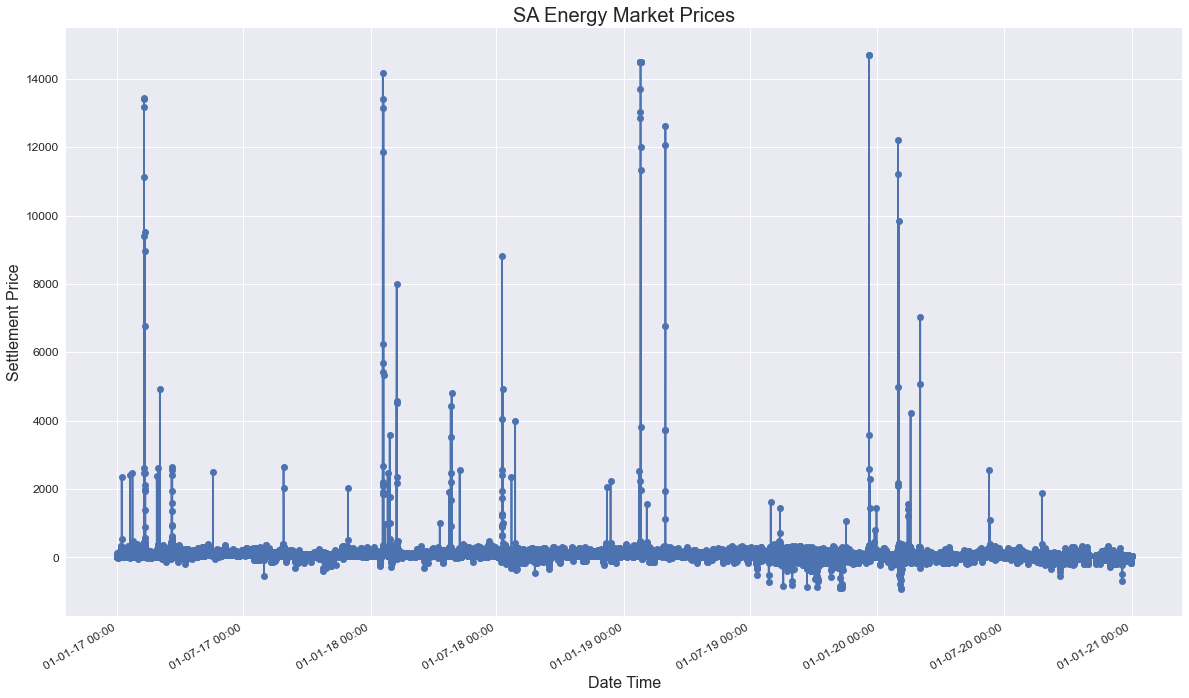

In [28]:
plt.figure(figsize=(20,12))
sa_price.sort_values('SETTLEMENTDATE', inplace=True)
price_date = sa_price['SETTLEMENTDATE']
price = sa_price['RRP']
plt.plot_date(price_date, price, linestyle='solid')
plt.gcf().autofmt_xdate()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
date_format = mpl_dates.DateFormatter('%d-%m-%y %H:%M')
plt.gca().xaxis.set_major_formatter(date_format)
#plt.tight_layout()
plt.title('SA Energy Market Prices',fontsize=20)
plt.xlabel('Date Time',fontsize=16)
plt.ylabel('Settlement Price', fontsize=16)
plt.show()

In [29]:
sa_price.describe()

,RRP
count,70128.000000
mean,86.879294
std,296.351773
min,-919.780000
25%,48.850000
50%,76.560000
75%,103.372500
max,14700.000000


In [8]:
sa_price[sa_price['RRP']>5000]

,SETTLEMENTDATE,RRP
1858,2017-02-08 17:30:00,11141.35
1859,2017-02-08 18:00:00,13160.01
1860,2017-02-08 18:30:00,13440.01
1861,2017-02-08 19:00:00,9387.38
1862,2017-02-08 19:30:00,13400.01
1905,2017-02-09 17:00:00,6755.00
1906,2017-02-09 17:30:00,8957.71
1908,2017-02-09 18:30:00,9509.52
18368,2018-01-18 16:30:00,6255.54
18369,2018-01-18 17:00:00,14166.50


In [6]:
sa_data = pd.read_csv("Data/PRICE_AND_DEMAND_SA.csv", header=0, index_col=False)
df = sa_data.drop(['PERIODTYPE','REGION','TOTALDEMAND'],axis=1)
df['SETTLEMENTDATE'] = pd.to_datetime(df['SETTLEMENTDATE'])
df = df[(df['SETTLEMENTDATE'] < datetime(2020,1,1,0,0)) & (df['SETTLEMENTDATE'] > datetime(2017,12,31,23,30))]
df.tail(10)

,SETTLEMENTDATE,RRP
52549,2019-12-31 19:00:00,65.15
52550,2019-12-31 19:30:00,58.55
52551,2019-12-31 20:00:00,53.20
52552,2019-12-31 20:30:00,55.54
52553,2019-12-31 21:00:00,58.02
52554,2019-12-31 21:30:00,63.35
52555,2019-12-31 22:00:00,57.12
52556,2019-12-31 22:30:00,61.83
52557,2019-12-31 23:00:00,57.42
52558,2019-12-31 23:30:00,68.58


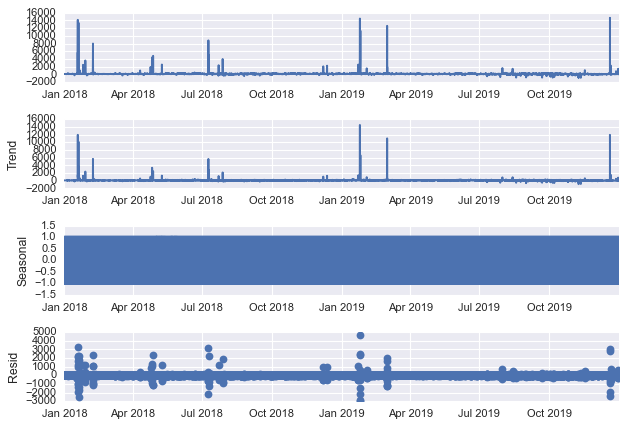

In [42]:
#df = df.set_index('SETTLEMENTDATE')
result = seasonal_decompose(df ,model='additive', period=2)
result.plot()
plt.show()

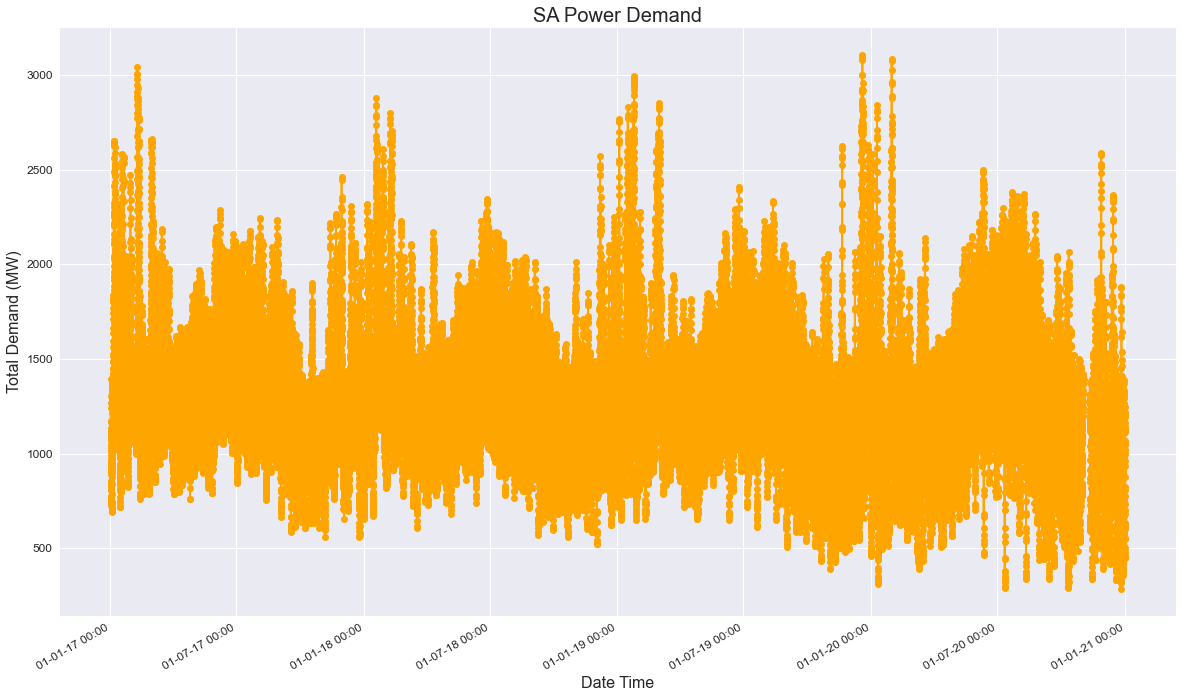

In [31]:
plt.figure(figsize=(20,12))
AEMO_df.sort_values('SETTLEMENTDATE', inplace=True)
demand_date = AEMO_df['SETTLEMENTDATE']
demand = AEMO_df['TOTALDEMAND']
plt.plot_date(demand_date, demand, linestyle='solid', color='orange')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d-%m-%y %H:%M')
plt.gca().xaxis.set_major_formatter(date_format)
#plt.tight_layout()
plt.title('SA Power Demand',fontsize=20)
plt.xlabel('Date Time', fontsize=16)
plt.ylabel('Total Demand (MW)',fontsize=16)
plt.show()